# 第6章『回帰分析』

## p.101

In [1]:
""" R自体に mtcarsというデータセットがビルトインされているが、Pythonではビルトインされていないので、今回はGithubに掲載されているmtcarsをインポートする。 """

import pandas as pd
mtcars = pd.read_csv('https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/64f1660f38ef523b2a1a13be77b002b98665cdfe/mtcars.csv')

In [2]:
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## p.105

In [3]:
""" Pythonでは、回帰分析の際には、sklearn.linear_model を利用する場合があるが、statmodelsの方が分析結果が一覧できる。 """
import statsmodels.formula.api as sm
kaiki1 = sm.ols(formula='mpg ~ disp', data=mtcars)
kaiki1_fitted = kaiki1.fit()
kaiki1_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           9.38e-10
Time:                        17:38:34   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
import numpy as np
np.quantile(kaiki1_fitted.resid, [0, 0.25, 0.5, 0.75, 1]) # 四分位を出力

array([-4.89220065, -2.20219093, -0.96308564,  1.62715468,  7.23054027])

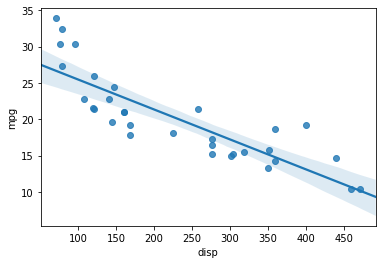

In [5]:
%matplotlib inline
import seaborn as sns
sns.regplot(x='disp', y='mpg', data=mtcars)

In [6]:
kaiki1_fitted.predict(pd.DataFrame({"disp": [100]})) # dispの値が100の場合

0    25.478343
dtype: float64

## p.108, 109

In [7]:
import statsmodels.formula.api as sm
kaiki2 = sm.ols(formula='mpg ~ disp + cyl', data=mtcars)
kaiki2_fitted = kaiki2.fit()
kaiki2_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     45.81
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           1.06e-09
Time:                        17:38:34   Log-Likelihood:                -79.573
No. Observations:                  32   AIC:                             165.1
Df Residuals:                      29   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6610      2.547     13.609      0.000      29.452      39.870
disp          -0.0206      0.010     -2.007      0.054      -0.042       0.000
cyl           -1.5873      0.712     -2.230      0.034      -3.043      -0.131
==============================================================================
Omnibus:                        3.200   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.660
Skew:                           0.701   Prob(JB):                        0.264
Kurtosis:                       2.822   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
np.quantile(kaiki2_fitted.resid, [0, 0.25, 0.5, 0.75, 1]) # 四分位を出力

array([-4.42126787, -2.17223578, -0.63623117,  1.18986716,  7.05160883])

In [9]:
kaiki2_fitted.fittedvalues

0     21.843953
1     21.843953
2     26.088855
3     19.826756
4     14.552672
5     20.506016
6     14.552672
7     25.292268
8     25.413712
9     21.687517
10    21.687517
11    16.285814
12    16.285814
13    16.285814
14    12.247305
15    12.494309
16    12.905982
17    26.691956
18    26.753706
19    26.848391
20    25.839793
21    15.417185
22    15.705356
23    14.758509
24    13.729327
25    26.685780
26    25.835676
27    26.354384
28    14.737925
29    22.152707
30    15.767107
31    25.821268
dtype: float64

In [10]:
kaiki2_fitted.resid

0    -0.843953
1    -0.843953
2    -3.288855
3     1.573244
4     4.147328
5    -2.406016
6    -0.252672
7    -0.892268
8    -2.613712
9    -2.487517
10   -3.887517
11    0.114186
12    1.014186
13   -1.085814
14   -1.847305
15   -2.094309
16    1.794018
17    5.708044
18    3.646294
19    7.051609
20   -4.339793
21    0.082815
22   -0.505356
23   -1.458509
24    5.470673
25    0.614220
26    0.164324
27    4.045616
28    1.062075
29   -2.452707
30   -0.767107
31   -4.421268
dtype: float64

In [11]:
pd.DataFrame({
    "mpg": mtcars["mpg"], 
    "kaiki2_fitted": kaiki2_fitted.fittedvalues
}).corr()

,mpg,kaiki2_fitted
mpg,1.000000,0.871531
kaiki2_fitted,0.871531,1.000000


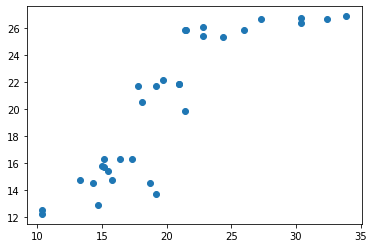

In [12]:
import matplotlib
%matplotlib inline
matplotlib.pyplot.scatter(mtcars["mpg"], kaiki2_fitted.fittedvalues)

In [13]:
kaiki2_fitted.predict(pd.DataFrame({"disp": [300.0,], "cyl": [8]})) # dispの値が300、cylが8の場合

0    15.78769
dtype: float64

## p.112

(array([ 1., 10.,  8.,  5.,  4.,  1.,  3.]),
 array([-6., -4., -2.,  0.,  2.,  4.,  6.,  8.]),
 <a list of 7 Patch objects>)

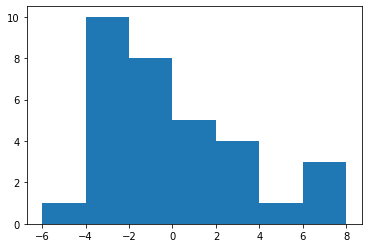

In [14]:
import matplotlib
%matplotlib inline
matplotlib.pyplot.hist(kaiki1_fitted.resid, range=(-6, 8), bins=7)

(array([2., 7., 9., 8., 1., 4., 1.]),
 array([-6., -4., -2.,  0.,  2.,  4.,  6.,  8.]),
 <a list of 7 Patch objects>)

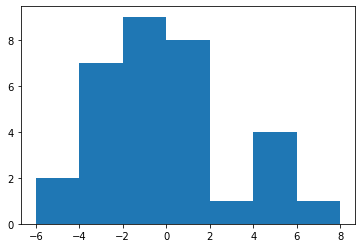

In [15]:
import matplotlib
%matplotlib inline
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
matplotlib.pyplot.hist(kaiki2_fitted.resid, range=(-6, 8), bins=7)

In [16]:
kaiki2_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     45.81
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           1.06e-09
Time:                        17:38:35   Log-Likelihood:                -79.573
No. Observations:                  32   AIC:                             165.1
Df Residuals:                      29   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6610      2.547     13.609      0.000      29.452      39.870
disp          -0.0206      0.010     -2.007      0.054      -0.042       0.000
cyl           -1.5873      0.712     -2.230      0.034      -3.043      -0.131
==============================================================================
Omnibus:                        3.200   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.660
Skew:                           0.701   Prob(JB):                        0.264
Kurtosis:                       2.822   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## p.115

In [17]:
""" Pythonでは statmodelsのsummary()で95%信頼区間もt値も一括で出力される。 """
kaiki2_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     45.81
Date:                Sat, 25 Jan 2020   Prob (F-statistic):           1.06e-09
Time:                        17:38:35   Log-Likelihood:                -79.573
No. Observations:                  32   AIC:                             165.1
Df Residuals:                      29   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6610      2.547     13.609      0.000      29.452      39.870
disp          -0.0206      0.010     -2.007      0.054      -0.042       0.000
cyl           -1.5873      0.712     -2.230      0.034      -3.043      -0.131
==============================================================================
Omnibus:                        3.200   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.660
Skew:                           0.701   Prob(JB):                        0.264
Kurtosis:                       2.822   Cond. No.                     1.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## p.122, 123

In [18]:
""" Pythonでは statmodelsのsummary()でAICの値も他の情報とともに一括で出力される。 """
print(kaiki1_fitted.aic) # AICの値のみを取り出す
print(kaiki2_fitted.aic) # AICの値のみを取り出す

168.2093890987089
165.14563701576952
